<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\lom\Desktop\banknotes.txt")
df.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Bar Chart (Year v/s Growth-Rate)

Text(0.5, 1.0, 'Growth-Rate')

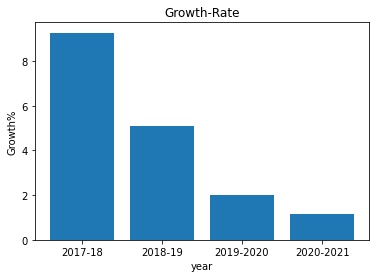

In [10]:
plt.bar(df['Expenditure'],df['Growth%'])
plt.xlabel("year")
plt.ylabel("Growth%")
plt.title("Growth-Rate")

**Looking at above Bar-Chart,we can clearly make out that there is declining pattern. This decline may be attributed to any of the expenditure factors. Let us device a method to predict Growth-rate based on various expenditure factors. 

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you taught the students in the class.
</b></p>

In [4]:
X = df[['variance','skewness','curtosis','entropy']]

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [7]:
X_train

,variance,skewness,curtosis,entropy
929,0.24394,1.47330,-1.41920,-0.58535
336,-1.25280,10.20360,2.17870,-5.60380
1344,0.29961,7.13280,-0.31475,-1.18280
771,-2.21730,1.46710,-0.72689,-1.17240
933,-2.57240,-0.95602,2.70730,-0.16639
...,...,...,...,...
1333,4.02150,-2.19140,2.46480,1.14090
715,-2.76110,-10.50990,9.02390,-1.95470
785,2.66820,10.21600,-3.44140,-4.00690
104,-0.27802,8.18810,-3.13380,-2.52760


In [8]:
X_test

,variance,skewness,curtosis,entropy
1102,2.45270,2.96530,0.20021,-0.056479
524,-2.82670,-9.04070,9.06940,-0.982330
780,-0.62684,-6.30100,4.78430,1.106000
121,-5.87300,9.17520,-0.27448,-6.042200
438,-0.77995,3.23220,-3.28200,-3.100400
...,...,...,...,...
364,4.54470,8.22740,-2.41660,-1.587500
218,-1.83480,11.03340,3.18630,-4.888800
262,-2.36290,-0.10554,1.93360,1.135800
47,-1.99830,-6.60720,4.82540,-0.419840


In [9]:
y_train

929     1
336     0
1344    0
771     1
933     1
       ..
1333    0
715     1
785     0
104     0
422     0
Name: class, Length: 1097, dtype: int64

In [10]:
y_test

1102    0
524     1
780     1
121     1
438     1
       ..
364     0
218     0
262     1
47      1
26      0
Name: class, Length: 275, dtype: int64

**Lets run linear regression model now**

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#from sklearn.linear_model import LinearRegression
#clf = LinearRegression()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
#X_testing=
#predictions = model.predict(X_testing)
X_test

,variance,skewness,curtosis,entropy
1102,2.45270,2.96530,0.20021,-0.056479
524,-2.82670,-9.04070,9.06940,-0.982330
780,-0.62684,-6.30100,4.78430,1.106000
121,-5.87300,9.17520,-0.27448,-6.042200
438,-0.77995,3.23220,-3.28200,-3.100400
...,...,...,...,...
364,4.54470,8.22740,-2.41660,-1.587500
218,-1.83480,11.03340,3.18630,-4.888800
262,-2.36290,-0.10554,1.93360,1.135800
47,-1.99830,-6.60720,4.82540,-0.419840


In [18]:
model.predict(X_test)
#model.predict([['-2.82670','-9.04','0.20021','-0.056479']])

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [23]:
y_test

1    5.11
Name: Growth%, dtype: float64

# It can be seen that model predicted the Growth % as 5.08 as compared to actual 5.11. This suggests that model is fairly accurate for the dataset. Further, prediction for any year can be made by following steps:

**random_state argument**

In [26]:
clf.predict('236,12500,747291.99,91004,115751,104718,0,0,23500,1880,45611,7200,27947,31000,320611,0,0,0,37453,0,391408,36503,347381,75649,6500,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48'
)

ValueError: Expected 2D array, got scalar array instead:
array=236,12500,747291.99,91004,115751,104718,0,0,23500,1880,45611,7200,27947,31000,320611,0,0,0,37453,0,391408,36503,347381,75649,6500,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

clf.predict('236','12500','747291.99','91004','115751','104718','0','0','23500','1880','45611','7200','27947','31000','320611','0','0','0','37453','0','391408','36503','347381','75649','6500','295218','8500','178659','0','0','0','0','237585.49','0','3144106.48'
)

In [39]:
df[['Bank Charges','Conveyance (Maint)','Depreciation','DTH Charges','Electrical Repair','General Repair','Gift Expenses (Maint)','Guest expenses (Maint)','Hiring Labour Charges','Insurance Premium','Internet Charges','Labour Charges','Laundry Charges','Light and Decoration','Listed property account','Mobile recharge','Prepaid Insurance Maint','Petrol','Printing and Stationery','Purchase (Diesel)','Purchase (Maint)','Purchase (Electrical items)','Rent and Allied charges (Maint)','Room maintenance','Uniform charges','Wages (Maint)','Party decoration','Maintenance','Miscellaneous','Diesel for OMQ','Electrical purchase','Rent and Allied charges O/S','WOC property items','Balance C/F','Total']]

,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,Insurance Premium,...,Wages (Maint),Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total
0,2837,0,659240.00,85603,215841,718357,0,0,0,0,...,84800,0,0,177854,27641,31073,22188,45173.00,438023,3829571.00
1,266,20250,791534.49,66872,125925,203113,36616,100000,128960,1873,...,96400,0,0,1508,0,0,0,223674.29,384052,3480395.00
2,236,12500,747291.99,91004,115751,104718,0,0,23500,1880,...,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48
3,4432,19590,691168.10,87341,231962,111870,0,0,1500,2058,...,197757,0,330136,0,0,0,0,97319.26,0,2855557.36


In [41]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Bank Charges','Conveyance (Maint)','Depreciation','DTH Charges','Electrical Repair','General Repair','Gift Expenses (Maint)','Guest expenses (Maint)','Hiring Labour Charges','Insurance Premium','Internet Charges','Labour Charges','Laundry Charges','Light and Decoration','Listed property account','Mobile recharge','Prepaid Insurance Maint','Petrol','Printing and Stationery','Purchase (Diesel)','Purchase (Maint)','Purchase (Electrical items)','Rent and Allied charges (Maint)','Room maintenance','Uniform charges','Wages (Maint)','Party decoration','Maintenance','Miscellaneous','Diesel for OMQ','Electrical purchase','Rent and Allied charges O/S','WOC property items','Balance C/F','Total']],df['Growth%'])

LinearRegression()

In [42]:
reg.coef_

array([ 1.16077004e-08, -5.54070021e-08, -3.88567520e-07, -2.80422755e-08,
        4.49526910e-07,  2.78394553e-06,  5.74899351e-09,  1.57007688e-08,
       -8.87778345e-08, -8.48923639e-09, -1.22131717e-07, -3.28787675e-08,
        2.23913186e-08,  3.55934951e-07, -1.47407517e-06,  5.20595183e-12,
        2.15100533e-11, -3.06530272e-10, -5.96159564e-08,  1.17771304e-09,
       -5.92232522e-07, -1.59365363e-07, -2.38300440e-07,  2.30083538e-06,
       -2.65631103e-08, -9.77535236e-07, -3.94176196e-08, -8.38944304e-07,
        8.02709288e-07,  1.24715457e-07,  1.40200550e-07,  1.00111666e-07,
       -8.65909816e-07,  2.03664725e-06,  3.15471980e-06])

In [43]:
reg.intercept_

-6.716581601931433

In [44]:
reg.predict([[236,12500,747291.99,91004,115751,104718,0,0,23500,1880,45611,7200,27947,31000,320611,0,0,0,37453,0,391408,36503,347381,75649,6500,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48]])

array([1.99])